<a href="https://colab.research.google.com/github/annasli378/analizaAK/blob/main/wyznaczenie_statystyk_dla_cech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importy


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, f_oneway, tukey_hsd, levene
import matplotlib.pyplot as plt

Funckje

In [ ]:
# Funkcja sprawdzająca normalność rozkładu danych za pomocą testu Shapiro-Wilka
def normality(Group1, Group2, Group3):
    print('Shapiro-Wilk Test p-values:')
    print(shapiro(Group1))
    print(shapiro(Group2))
    print(shapiro(Group3))
    return [shapiro(Group1).pvalue , shapiro(Group2).pvalue, shapiro(Group3).pvalue]

In [ ]:
# Funkcja sprawdzająca równość wariancji za pomocą testu Levene'a
def varin(Group1, Group2, Group3):
  return levene(Group1, Group2, Group3, center='median')

In [ ]:
# Funkcja przeprowadzająca analizę wariancji (ANOVA) i wyświetlająca wyniki
def get_anova(Group1, Group2, Group3):
  alpha_anova =0.05
  #data = [Group1, Group2, Group3]
  f_val, p_val = f_oneway(Group1, Group2, Group3)
  if p_val < alpha_anova:
        print(f'One-Way ANOVA: There is a significant difference between groups (p = {round(p_val, 4)}).')
  else:
        print(f'One-Way ANOVA: No significant difference between groups (p = {round(p_val, 4)}).')
  return p_val



In [ ]:
# Funkcja przeprowadzająca test Tukeya HSD i wyświetlająca wyniki
def get_tukey(Group1, Group2, Group3):
  tukey = tukey_hsd(Group1, Group2, Group3)
  print(tukey)

  return tukey.pvalue

Wczytanie i podział danych

In [42]:
# Wczytanie danych z plików CSV
nazwa = 'ALL_CFPNET'

CECHY = pd.read_csv('/content/drive/MyDrive/USG/cechy_nowe/'+nazwa+".csv")
CECHY_nowe = pd.read_csv('/content/drive/MyDrive/USG/cechy_nowe/'+nazwa+".csv")
column_names = list(CECHY.columns)
CECHY = CECHY.values
Y = pd.read_csv('/content/drive/MyDrive/USG/cechy_nowe/Y_alfabetycznie.csv', header = None).values

# Określenie wymiarów macierzy danych
w,k = CECHY.shape

# Inicjalizacja pustych list dla grup
ak1, ak2, ak3 = np.zeros((95,k)), np.zeros((48,k)), np.zeros((32,k))
c1, c2, c3 = 0, 0 ,0

# Podział danych na trzy grupy na podstawie Y
for wiersz in range(0,175):
    if Y[wiersz] == 1:
        ak1[c1, :] = CECHY[wiersz, :]
        c1+=1
    elif Y[wiersz] == 2:
        ak2[c2, :] = CECHY[wiersz, :]
        c2+=1
    elif Y[wiersz] == 3:
        ak3[c3, :] = CECHY[wiersz, :]
        c3+=1

print(column_names)

['LEP num1 roi', 'MEP num1 roi', 'HEP num1 roi', 'LEP num2 roi', 'MEP num2 roi', 'HEP num2 roi', 'LEP num3 roi', 'MEP num3 roi', 'HEP num3 roi', 'entropy 1 roi', 'mean 1 roi', 'median 1 roi', 'var 1 roi', 'std 1 roi', 'q1 1 roi', 'q3 1 roi', 'skewness 1 roi', 'kurtosis 1 roi', 'entropy 2 roi', 'mean 2 roi', 'median 2 roi', 'var 2 roi', 'std 2 roi', 'q1 2 roi', 'q3 2 roi', 'skewness 2 roi', 'kurtosis 2 roi', 'entropy 3 roi', 'mean 3 roi', 'median 3 roi', 'var 3 roi', 'std 3 roi', 'q1 3 roi', 'q3 3 roi', 'skewness 3 roi', 'kurtosis 3 roi', '2glcm1 contrast roi', '2glcm2 contrast roi', '2glcm3 contrast roi', '2glcm4 contrast roi', '2glcm1 corr roi', '2glcm2 corr roi', '2glcm3 corr roi', '2glcm4 corr roi', '2glcm1 ener roi', '2glcm2 ener roi', '2glcm3 ener roi', '2glcm4 ener roi', '2glcm1 homog roi', '2glcm2 homog roi', '2glcm3 homog roi', '2glcm4 homog roi', '4glcm1 contrast roi', '4glcm2 contrast roi', '4glcm3 contrast roi', '4glcm4 contrast roi', '4glcm1 corr roi', '4glcm2 corr roi', '4

analiza

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8125855922698975, pvalue=1.2245485736528394e-09)
ShapiroResult(statistic=0.9524245262145996, pvalue=0.049975454807281494)
ShapiroResult(statistic=0.8724398016929626, pvalue=0.0013223529094830155)
One-Way ANOVA: No significant difference between groups (p = 0.2939).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8083029389381409, pvalue=9.005627910063652e-10)
ShapiroResult(statistic=0.8530534505844116, pvalue=2.6231344236293808e-05)
ShapiroResult(statistic=0.8474112153053284, pvalue=0.00036480548442341387)
One-Way ANOVA: There is a significant difference between groups (p = 0.0152).


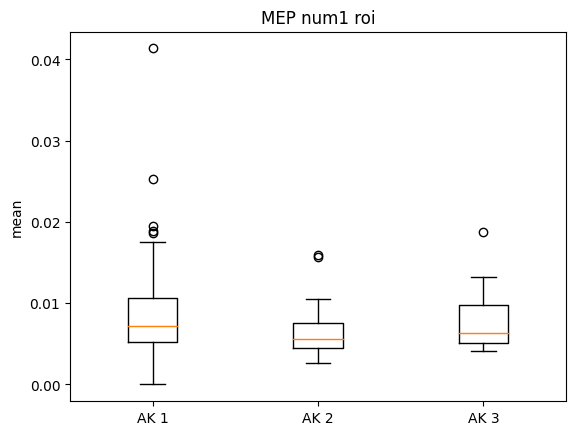

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.002     0.011     0.000     0.004
 (0 - 2)      0.001     0.475    -0.001     0.003
 (1 - 0)     -0.002     0.011    -0.004    -0.000
 (1 - 2)     -0.001     0.447    -0.004     0.001
 (2 - 0)     -0.001     0.475    -0.003     0.001
 (2 - 1)      0.001     0.447    -0.001     0.004

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8119621872901917, pvalue=1.1706475788741955e-09)
ShapiroResult(statistic=0.9564352631568909, pvalue=0.07245810329914093)
ShapiroResult(statistic=0.8750811815261841, pvalue=0.0015241027576848865)
One-Way ANOVA: No significant difference between groups (p = 0.3315).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9757395386695862, pvalue=0.07462744414806366)
ShapiroResult(statistic=0.9684350490570068, pvalue=0.2199839949607849)
ShapiroResult(statistic=0.9675949811935425, pvalue=0.4358106553554535)
One-Way ANOVA: No si

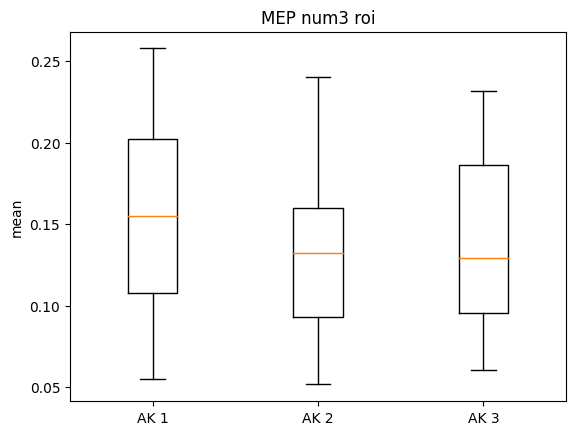

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.023     0.039     0.001     0.045
 (0 - 2)      0.017     0.275    -0.009     0.042
 (1 - 0)     -0.023     0.039    -0.045    -0.001
 (1 - 2)     -0.006     0.855    -0.035     0.022
 (2 - 0)     -0.017     0.275    -0.042     0.009
 (2 - 1)      0.006     0.855    -0.022     0.035

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.797369122505188, pvalue=4.191428037980671e-10)
ShapiroResult(statistic=0.9376143217086792, pvalue=0.013152383267879486)
ShapiroResult(statistic=0.8928579688072205, pvalue=0.004094782751053572)
One-Way ANOVA: No significant difference between groups (p = 0.426).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9925734996795654, pvalue=0.8803086876869202)
ShapiroResult(statistic=0.981059193611145, pvalue=0.6233629584312439)
ShapiroResult(statistic=0.9668970108032227, pvalue=0.41845741868019104)
One-Way ANOVA: No signif

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn

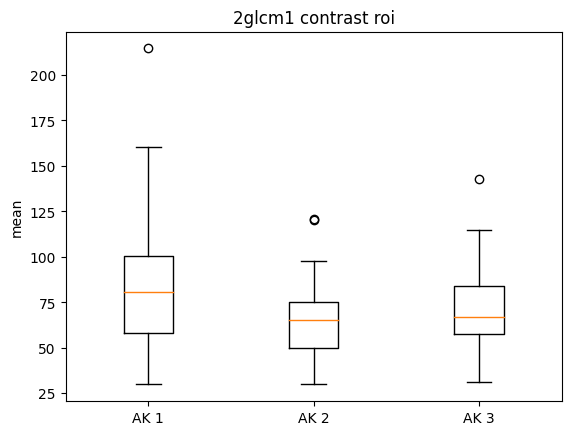

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     17.083     0.002     5.265    28.900
 (0 - 2)      9.335     0.241    -4.305    22.974
 (1 - 0)    -17.083     0.002   -28.900    -5.265
 (1 - 2)     -7.748     0.453   -22.978     7.482
 (2 - 0)     -9.335     0.241   -22.974     4.305
 (2 - 1)      7.748     0.453    -7.482    22.978

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9682566523551941, pvalue=0.020831655710935593)
ShapiroResult(statistic=0.9780288934707642, pvalue=0.4994356334209442)
ShapiroResult(statistic=0.9484144449234009, pvalue=0.1299164891242981)
One-Way ANOVA: No significant difference between groups (p = 0.1197).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.933570384979248, pvalue=0.00012106735084671527)
ShapiroResult(statistic=0.9780781865119934, pvalue=0.5013416409492493)
ShapiroResult(statistic=0.9266753792762756, pvalue=0.03166862949728966)
One-Way ANOVA: No signi

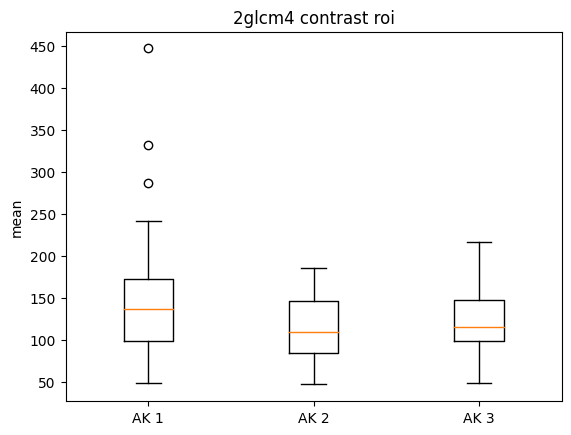

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     26.944     0.015     4.375    49.514
 (0 - 2)     16.927     0.277    -9.122    42.977
 (1 - 0)    -26.944     0.015   -49.514    -4.375
 (1 - 2)    -10.017     0.695   -39.103    19.069
 (2 - 0)    -16.927     0.277   -42.977     9.122
 (2 - 1)     10.017     0.695   -19.069    39.103

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9912457466125488, pvalue=0.7917994260787964)
ShapiroResult(statistic=0.924096405506134, pvalue=0.004158237017691135)
ShapiroResult(statistic=0.9621249437332153, pvalue=0.31369152665138245)
One-Way ANOVA: There is a significant difference between groups (p = 0.0014).


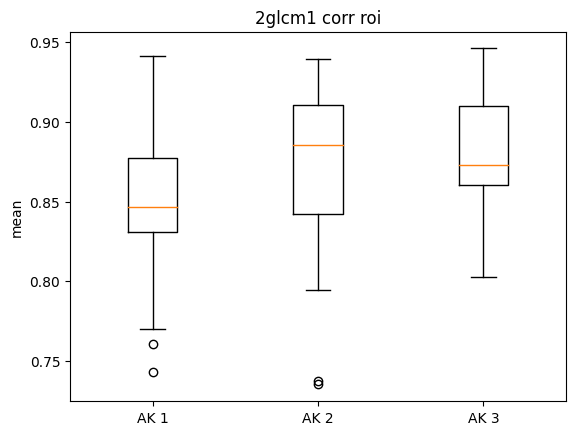

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.021     0.014    -0.039    -0.004
 (0 - 2)     -0.026     0.007    -0.047    -0.006
 (1 - 0)      0.021     0.014     0.004     0.039
 (1 - 2)     -0.005     0.841    -0.028     0.017
 (2 - 0)      0.026     0.007     0.006     0.047
 (2 - 1)      0.005     0.841    -0.017     0.028

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9930403232574463, pvalue=0.9066075682640076)
ShapiroResult(statistic=0.9164338707923889, pvalue=0.0022306672763079405)
ShapiroResult(statistic=0.9708721041679382, pvalue=0.523817241191864)
One-Way ANOVA: There is a significant difference between groups (p = 0.0045).


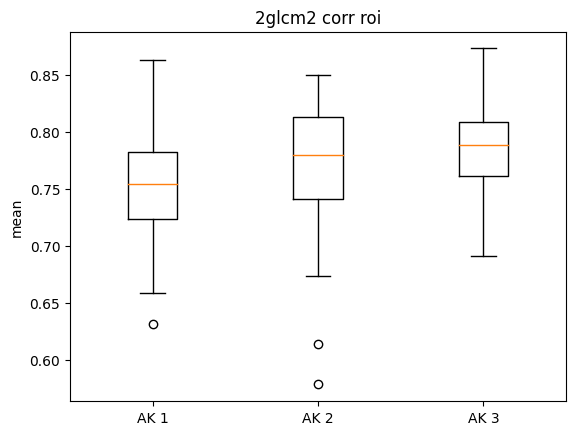

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.017     0.130    -0.039     0.004
 (0 - 2)     -0.033     0.005    -0.057    -0.008
 (1 - 0)      0.017     0.130    -0.004     0.039
 (1 - 2)     -0.015     0.384    -0.043     0.012
 (2 - 0)      0.033     0.005     0.008     0.057
 (2 - 1)      0.015     0.384    -0.012     0.043

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9916157722473145, pvalue=0.8181182742118835)
ShapiroResult(statistic=0.9117918014526367, pvalue=0.0015453525120392442)
ShapiroResult(statistic=0.9631147384643555, pvalue=0.3334381580352783)
One-Way ANOVA: There is a significant difference between groups (p = 0.0002).


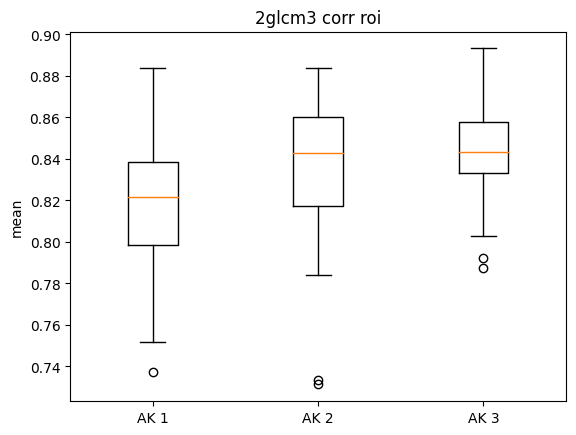

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.014     0.024    -0.027    -0.002
 (0 - 2)     -0.025     0.000    -0.040    -0.010
 (1 - 0)      0.014     0.024     0.002     0.027
 (1 - 2)     -0.010     0.304    -0.027     0.006
 (2 - 0)      0.025     0.000     0.010     0.040
 (2 - 1)      0.010     0.304    -0.006     0.027

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9819066524505615, pvalue=0.21378885209560394)
ShapiroResult(statistic=0.9180989861488342, pvalue=0.0025493204593658447)
ShapiroResult(statistic=0.9742069244384766, pvalue=0.6225378513336182)
One-Way ANOVA: There is a significant difference between groups (p = 0.0001).


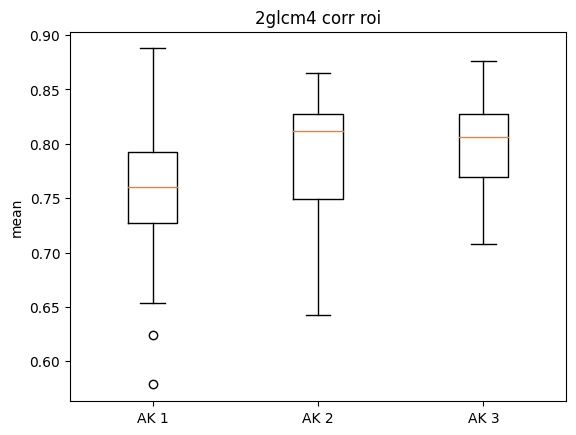

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.031     0.003    -0.052    -0.009
 (0 - 2)     -0.041     0.000    -0.066    -0.016
 (1 - 0)      0.031     0.003     0.009     0.052
 (1 - 2)     -0.010     0.657    -0.038     0.017
 (2 - 0)      0.041     0.000     0.016     0.066
 (2 - 1)      0.010     0.657    -0.017     0.038

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8563682436943054, pvalue=3.8029753568480373e-08)
ShapiroResult(statistic=0.8721741437911987, pvalue=8.919489482650533e-05)
ShapiroResult(statistic=0.8375646471977234, pvalue=0.00022572559828404337)
One-Way ANOVA: No significant difference between groups (p = 0.5883).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8489594459533691, pvalue=2.0383573939852795e-08)
ShapiroResult(statistic=0.8717080354690552, pvalue=8.648163202451542e-05)
ShapiroResult(statistic=0.8262953162193298, pvalue=0.00013251960626803339)
One-Way

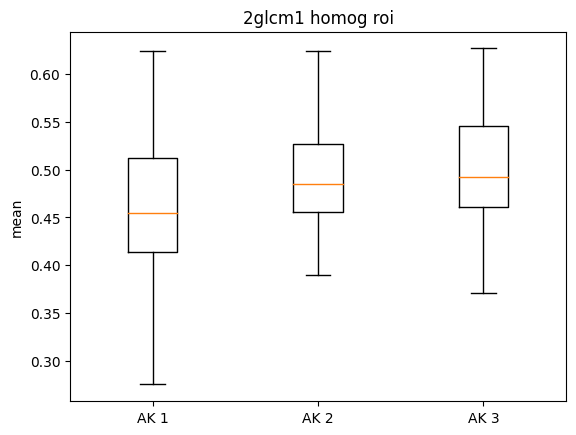

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.035     0.006    -0.061    -0.008
 (0 - 2)     -0.035     0.020    -0.066    -0.005
 (1 - 0)      0.035     0.006     0.008     0.061
 (1 - 2)     -0.000     0.999    -0.035     0.034
 (2 - 0)      0.035     0.020     0.005     0.066
 (2 - 1)      0.000     0.999    -0.034     0.035

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9627749919891357, pvalue=0.008441239595413208)
ShapiroResult(statistic=0.9613850712776184, pvalue=0.1148502454161644)
ShapiroResult(statistic=0.9769400954246521, pvalue=0.7070149779319763)
One-Way ANOVA: There is a significant difference between groups (p = 0.004).


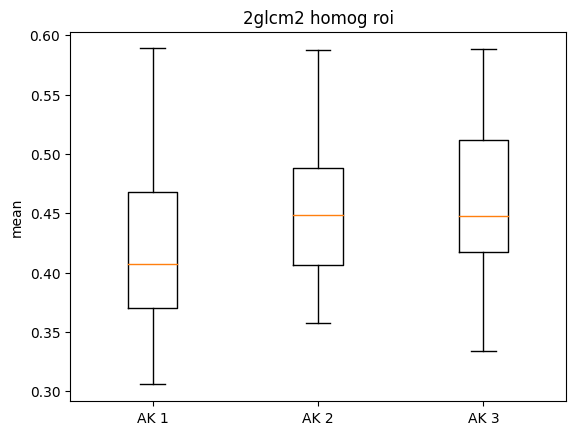

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.033     0.013    -0.060    -0.006
 (0 - 2)     -0.034     0.031    -0.065    -0.002
 (1 - 0)      0.033     0.013     0.006     0.060
 (1 - 2)     -0.001     0.998    -0.036     0.034
 (2 - 0)      0.034     0.031     0.002     0.065
 (2 - 1)      0.001     0.998    -0.034     0.036

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9665839672088623, pvalue=0.015759065747261047)
ShapiroResult(statistic=0.9664233326911926, pvalue=0.18307915329933167)
ShapiroResult(statistic=0.974730372428894, pvalue=0.6385999321937561)
One-Way ANOVA: There is a significant difference between groups (p = 0.0021).


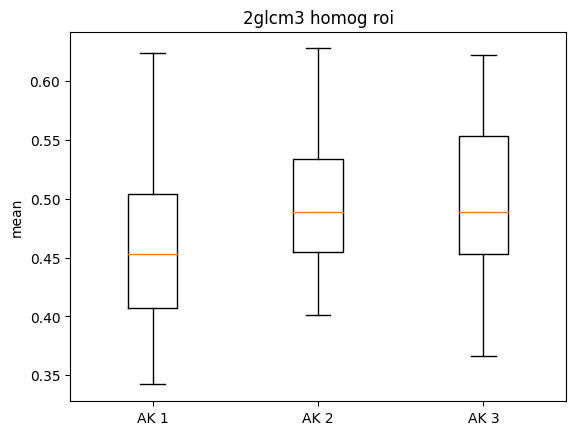

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.036     0.007    -0.063    -0.008
 (0 - 2)     -0.035     0.025    -0.066    -0.003
 (1 - 0)      0.036     0.007     0.008     0.063
 (1 - 2)      0.001     0.999    -0.035     0.036
 (2 - 0)      0.035     0.025     0.003     0.066
 (2 - 1)     -0.001     0.999    -0.036     0.035

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9749940633773804, pvalue=0.06563393771648407)
ShapiroResult(statistic=0.9604492783546448, pvalue=0.10527131706476212)
ShapiroResult(statistic=0.9856460094451904, pvalue=0.9368487596511841)
One-Way ANOVA: There is a significant difference between groups (p = 0.0016).


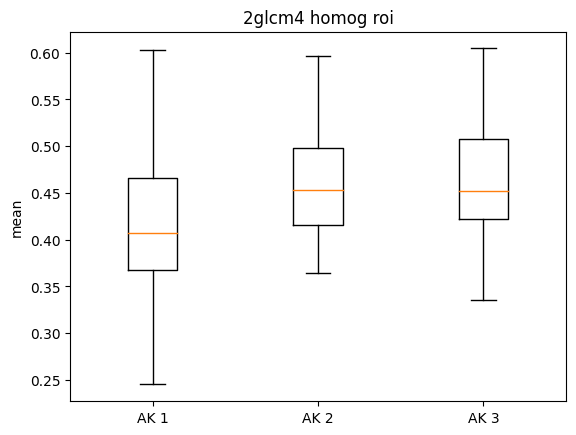

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.037     0.006    -0.065    -0.009
 (0 - 2)     -0.037     0.019    -0.070    -0.005
 (1 - 0)      0.037     0.006     0.009     0.065
 (1 - 2)     -0.000     1.000    -0.036     0.036
 (2 - 0)      0.037     0.019     0.005     0.070
 (2 - 1)      0.000     1.000    -0.036     0.036

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8303028345108032, pvalue=4.59234961169841e-09)
ShapiroResult(statistic=0.973981499671936, pvalue=0.3590005040168762)
ShapiroResult(statistic=0.9683442711830139, pvalue=0.4550017714500427)
One-Way ANOVA: There is a significant difference between groups (p = 0.0058).


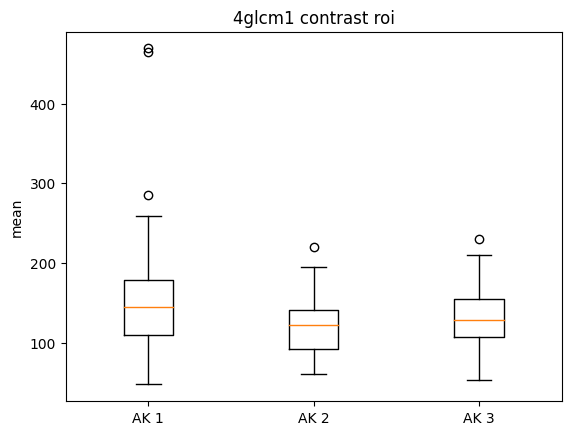

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     31.388     0.005     7.952    54.825
 (0 - 2)     18.895     0.227    -8.155    45.946
 (1 - 0)    -31.388     0.005   -54.825    -7.952
 (1 - 2)    -12.493     0.592   -42.696    17.710
 (2 - 0)    -18.895     0.227   -45.946     8.155
 (2 - 1)     12.493     0.592   -17.710    42.696

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9270695447921753, pvalue=5.288227112032473e-05)
ShapiroResult(statistic=0.9785905480384827, pvalue=0.5214031338691711)
ShapiroResult(statistic=0.9353765249252319, pvalue=0.05540291592478752)
One-Way ANOVA: No significant difference between groups (p = 0.4681).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9091892242431641, pvalue=6.443086931540165e-06)
ShapiroResult(statistic=0.9816287755966187, pvalue=0.6477609872817993)
ShapiroResult(statistic=0.9206801056861877, pvalue=0.021693043410778046)
One-Way ANOVA: No si

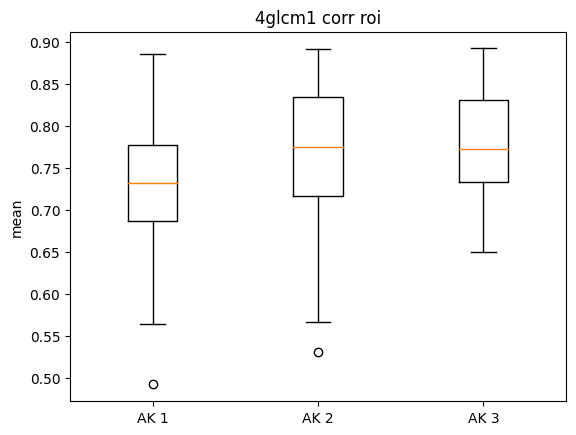

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.037     0.018    -0.069    -0.005
 (0 - 2)     -0.048     0.006    -0.085    -0.012
 (1 - 0)      0.037     0.018     0.005     0.069
 (1 - 2)     -0.011     0.784    -0.052     0.029
 (2 - 0)      0.048     0.006     0.012     0.085
 (2 - 1)      0.011     0.784    -0.029     0.052

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.864629864692688, pvalue=7.806121971043467e-08)
ShapiroResult(statistic=0.9703448414802551, pvalue=0.26125890016555786)
ShapiroResult(statistic=0.970666766166687, pvalue=0.5180060267448425)
One-Way ANOVA: There is a significant difference between groups (p = 0.0086).


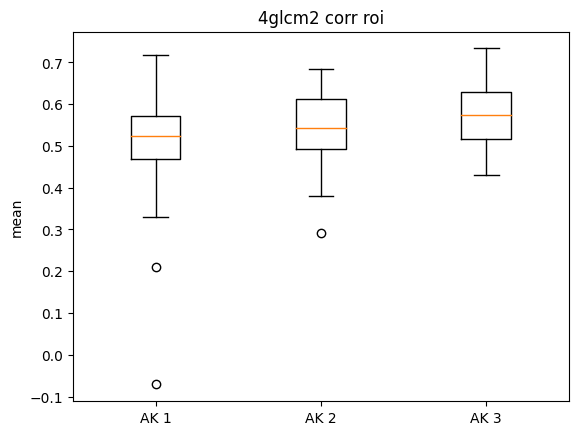

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.027     0.262    -0.067     0.014
 (0 - 2)     -0.060     0.008    -0.106    -0.013
 (1 - 0)      0.027     0.262    -0.014     0.067
 (1 - 2)     -0.033     0.289    -0.085     0.019
 (2 - 0)      0.060     0.008     0.013     0.106
 (2 - 1)      0.033     0.289    -0.019     0.085

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.5716981887817383, pvalue=3.2678010179808346e-15)
ShapiroResult(statistic=0.9683310985565186, pvalue=0.21791887283325195)
ShapiroResult(statistic=0.9704839587211609, pvalue=0.5128651261329651)
One-Way ANOVA: There is a significant difference between groups (p = 0.0029).


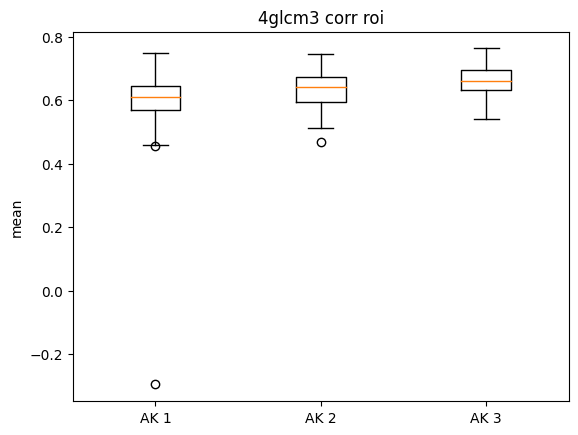

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.032     0.123    -0.070     0.006
 (0 - 2)     -0.062     0.003    -0.105    -0.018
 (1 - 0)      0.032     0.123    -0.006     0.070
 (1 - 2)     -0.030     0.324    -0.079     0.019
 (2 - 0)      0.062     0.003     0.018     0.105
 (2 - 1)      0.030     0.324    -0.019     0.079

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7248272895812988, pvalue=4.7314491734284925e-12)
ShapiroResult(statistic=0.9367135763168335, pvalue=0.012155416421592236)
ShapiroResult(statistic=0.9677119851112366, pvalue=0.43876901268959045)
One-Way ANOVA: There is a significant difference between groups (p = 0.0005).


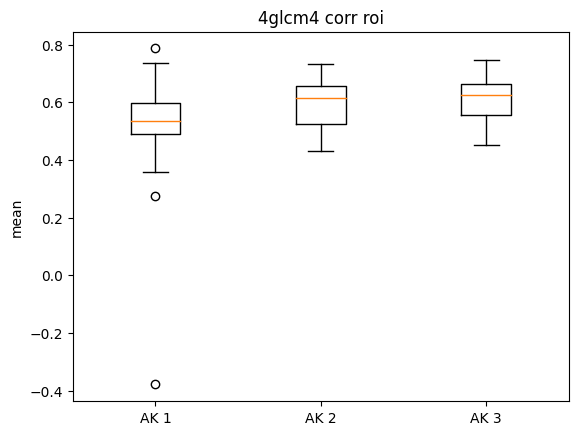

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.056     0.013    -0.102    -0.010
 (0 - 2)     -0.079     0.002    -0.132    -0.026
 (1 - 0)      0.056     0.013     0.010     0.102
 (1 - 2)     -0.024     0.618    -0.083     0.036
 (2 - 0)      0.079     0.002     0.026     0.132
 (2 - 1)      0.024     0.618    -0.036     0.083

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8623678684234619, pvalue=6.394382268126719e-08)
ShapiroResult(statistic=0.8822859525680542, pvalue=0.000176811488927342)
ShapiroResult(statistic=0.8218315839767456, pvalue=0.00010782280878629535)
One-Way ANOVA: No significant difference between groups (p = 0.6364).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8365560173988342, pvalue=7.477399144306673e-09)
ShapiroResult(statistic=0.8821268081665039, pvalue=0.00017487932927906513)
ShapiroResult(statistic=0.8020467758178711, pvalue=4.454157897271216e-05)
One-Way AN

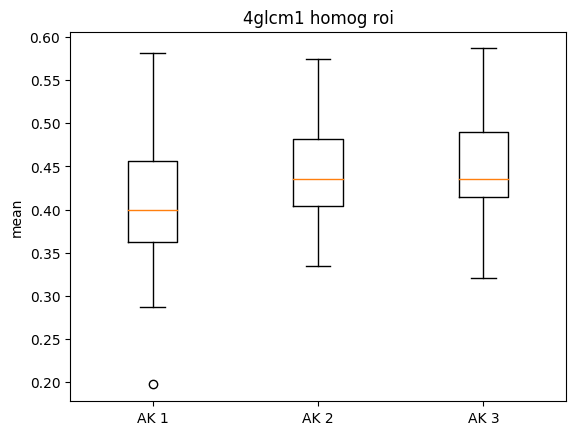

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.035     0.010    -0.062    -0.007
 (0 - 2)     -0.035     0.026    -0.067    -0.003
 (1 - 0)      0.035     0.010     0.007     0.062
 (1 - 2)     -0.001     0.998    -0.036     0.035
 (2 - 0)      0.035     0.026     0.003     0.067
 (2 - 1)      0.001     0.998    -0.035     0.036

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.940133810043335, pvalue=0.00029052566969767213)
ShapiroResult(statistic=0.9634095430374146, pvalue=0.13861514627933502)
ShapiroResult(statistic=0.9676956534385681, pvalue=0.43835458159446716)
One-Way ANOVA: There is a significant difference between groups (p = 0.0184).


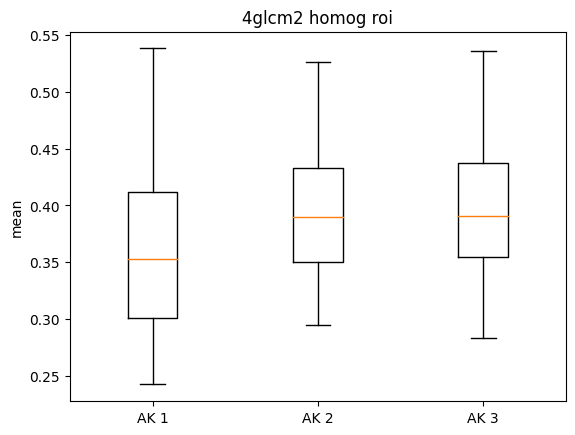

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.030     0.040    -0.059    -0.001
 (0 - 2)     -0.030     0.088    -0.064     0.003
 (1 - 0)      0.030     0.040     0.001     0.059
 (1 - 2)     -0.000     1.000    -0.037     0.037
 (2 - 0)      0.030     0.088    -0.003     0.064
 (2 - 1)      0.000     1.000    -0.037     0.037

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9464604258537292, pvalue=0.0007034462760202587)
ShapiroResult(statistic=0.9614025354385376, pvalue=0.11503665149211884)
ShapiroResult(statistic=0.9691933393478394, pvalue=0.47743549942970276)
One-Way ANOVA: There is a significant difference between groups (p = 0.0044).


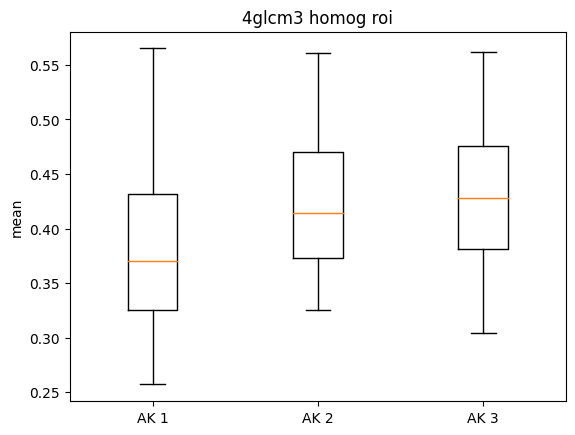

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.035     0.015    -0.065    -0.006
 (0 - 2)     -0.037     0.031    -0.071    -0.003
 (1 - 0)      0.035     0.015     0.006     0.065
 (1 - 2)     -0.002     0.994    -0.040     0.036
 (2 - 0)      0.037     0.031     0.003     0.071
 (2 - 1)      0.002     0.994    -0.036     0.040

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9589785933494568, pvalue=0.004606015048921108)
ShapiroResult(statistic=0.9462652206420898, pvalue=0.028448553755879402)
ShapiroResult(statistic=0.959018886089325, pvalue=0.25815632939338684)
One-Way ANOVA: There is a significant difference between groups (p = 0.0062).


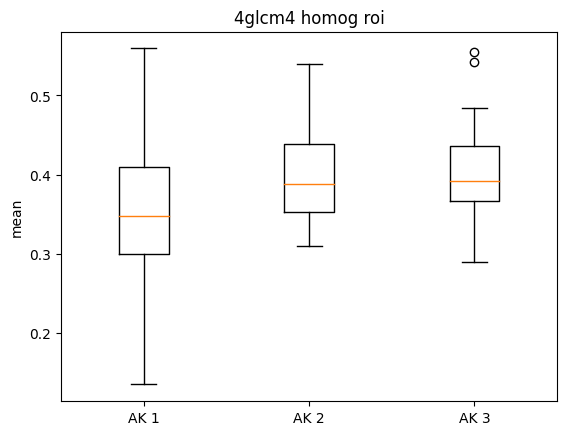

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.037     0.015    -0.068    -0.006
 (0 - 2)     -0.035     0.052    -0.071     0.000
 (1 - 0)      0.037     0.015     0.006     0.068
 (1 - 2)      0.001     0.997    -0.039     0.041
 (2 - 0)      0.035     0.052    -0.000     0.071
 (2 - 1)     -0.001     0.997    -0.041     0.039

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7433215379714966, pvalue=1.364159826766631e-11)
ShapiroResult(statistic=0.9668745994567871, pvalue=0.19081243872642517)
ShapiroResult(statistic=0.9613348841667175, pvalue=0.2986559569835663)
One-Way ANOVA: No significant difference between groups (p = 0.0659).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9597280025482178, pvalue=0.005184154491871595)
ShapiroResult(statistic=0.9733537435531616, pvalue=0.3402237296104431)
ShapiroResult(statistic=0.9038151502609253, pvalue=0.007756228093057871)
One-Way ANOVA: No sig

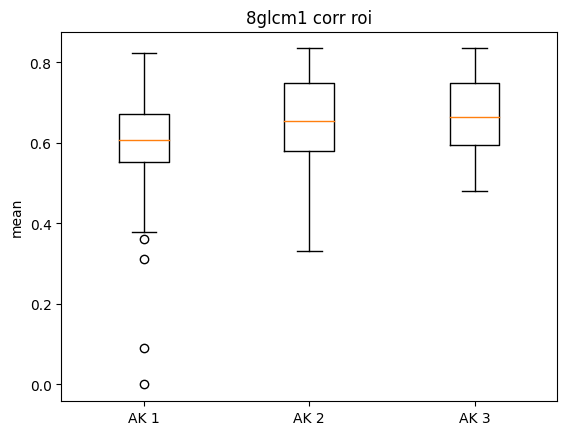

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.054     0.035    -0.105    -0.003
 (0 - 2)     -0.067     0.021    -0.126    -0.008
 (1 - 0)      0.054     0.035     0.003     0.105
 (1 - 2)     -0.013     0.889    -0.079     0.053
 (2 - 0)      0.067     0.021     0.008     0.126
 (2 - 1)      0.013     0.889    -0.053     0.079

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9597277045249939, pvalue=0.005183912348002195)
ShapiroResult(statistic=0.9683659672737122, pvalue=0.21860945224761963)
ShapiroResult(statistic=0.9525576829910278, pvalue=0.17030248045921326)
One-Way ANOVA: No significant difference between groups (p = 0.0532).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9815577268600464, pvalue=0.20169150829315186)
ShapiroResult(statistic=0.9759329557418823, pvalue=0.4225948452949524)
ShapiroResult(statistic=0.9511124491691589, pvalue=0.15498954057693481)
One-Way ANOVA: There is

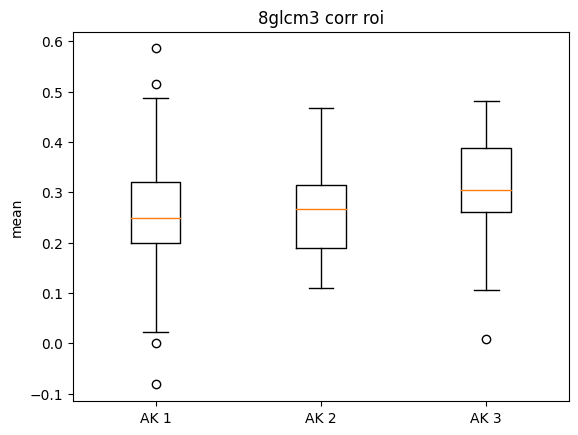

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.012     0.781    -0.055     0.031
 (0 - 2)     -0.063     0.009    -0.112    -0.013
 (1 - 0)      0.012     0.781    -0.031     0.055
 (1 - 2)     -0.051     0.080    -0.106     0.005
 (2 - 0)      0.063     0.009     0.013     0.112
 (2 - 1)      0.051     0.080    -0.005     0.106

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9891827702522278, pvalue=0.6347981691360474)
ShapiroResult(statistic=0.9733626246452332, pvalue=0.34048423171043396)
ShapiroResult(statistic=0.925078272819519, pvalue=0.028615102171897888)
One-Way ANOVA: There is a significant difference between groups (p = 0.0021).


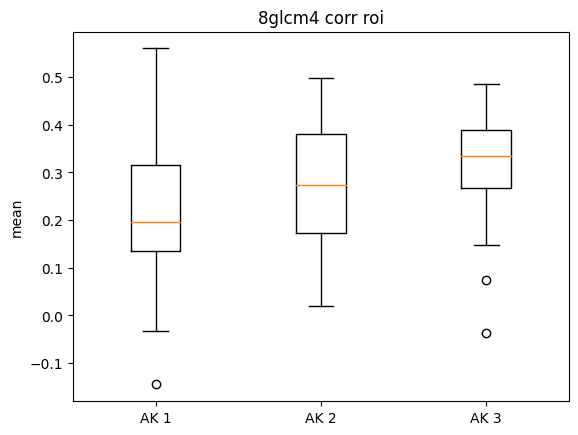

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.055     0.052    -0.109     0.000
 (0 - 2)     -0.087     0.004    -0.151    -0.024
 (1 - 0)      0.055     0.052    -0.000     0.109
 (1 - 2)     -0.033     0.516    -0.104     0.038
 (2 - 0)      0.087     0.004     0.024     0.151
 (2 - 1)      0.033     0.516    -0.038     0.104

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8574115037918091, pvalue=4.158579969271159e-08)
ShapiroResult(statistic=0.8945657014846802, pvalue=0.00042178292642347515)
ShapiroResult(statistic=0.797555148601532, pvalue=3.6678295145975426e-05)
One-Way ANOVA: No significant difference between groups (p = 0.5619).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7886543869972229, pvalue=2.322470410431876e-10)
ShapiroResult(statistic=0.8851466178894043, pvalue=0.00021566347277257591)
ShapiroResult(statistic=0.7821767330169678, pvalue=1.9181397874490358e-05)
One-Way 

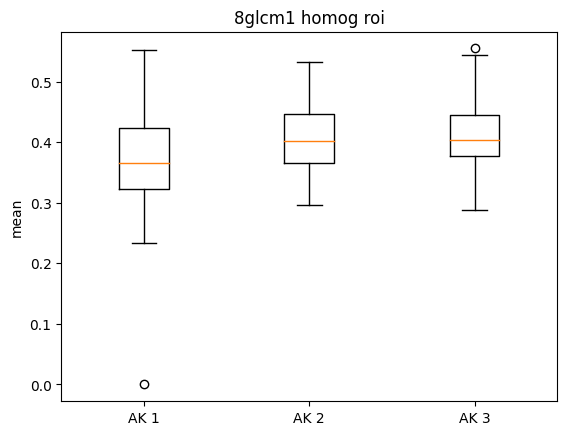

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.035     0.016    -0.065    -0.005
 (0 - 2)     -0.033     0.070    -0.067     0.002
 (1 - 0)      0.035     0.016     0.005     0.065
 (1 - 2)      0.003     0.985    -0.036     0.041
 (2 - 0)      0.033     0.070    -0.002     0.067
 (2 - 1)     -0.003     0.985    -0.041     0.036

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9610247611999512, pvalue=0.006371109280735254)
ShapiroResult(statistic=0.9756351709365845, pvalue=0.4123804569244385)
ShapiroResult(statistic=0.9681004285812378, pvalue=0.44869300723075867)
One-Way ANOVA: No significant difference between groups (p = 0.0875).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9666174650192261, pvalue=0.01584700308740139)
ShapiroResult(statistic=0.9762816429138184, pvalue=0.43478116393089294)
ShapiroResult(statistic=0.9833076596260071, pvalue=0.8879187107086182)
One-Way ANOVA: There is 

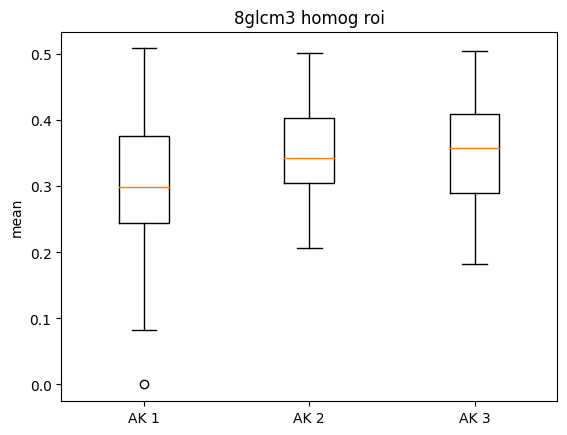

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.036     0.054    -0.073     0.001
 (0 - 2)     -0.035     0.129    -0.077     0.007
 (1 - 0)      0.036     0.054    -0.001     0.073
 (1 - 2)      0.001     0.998    -0.046     0.048
 (2 - 0)      0.035     0.129    -0.007     0.077
 (2 - 1)     -0.001     0.998    -0.048     0.046

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9645248055458069, pvalue=0.011222651228308678)
ShapiroResult(statistic=0.9637042284011841, pvalue=0.1424536257982254)
ShapiroResult(statistic=0.9698340892791748, pvalue=0.49483129382133484)
One-Way ANOVA: There is a significant difference between groups (p = 0.0341).


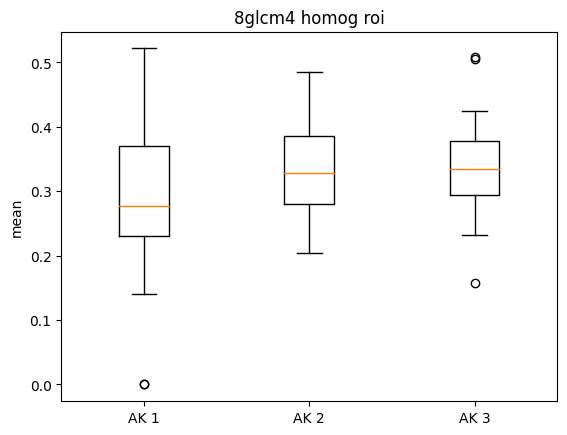

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.038     0.046    -0.076    -0.001
 (0 - 2)     -0.032     0.200    -0.075     0.012
 (1 - 0)      0.038     0.046     0.001     0.076
 (1 - 2)      0.007     0.945    -0.042     0.055
 (2 - 0)      0.032     0.200    -0.012     0.075
 (2 - 1)     -0.007     0.945    -0.055     0.042

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.891160786151886, pvalue=9.55423388404597e-07)
ShapiroResult(statistic=0.9057688117027283, pvalue=0.0009705681586638093)
ShapiroResult(statistic=0.9505747556686401, pvalue=0.14964085817337036)
One-Way ANOVA: There is a significant difference between groups (p = 0.0057).


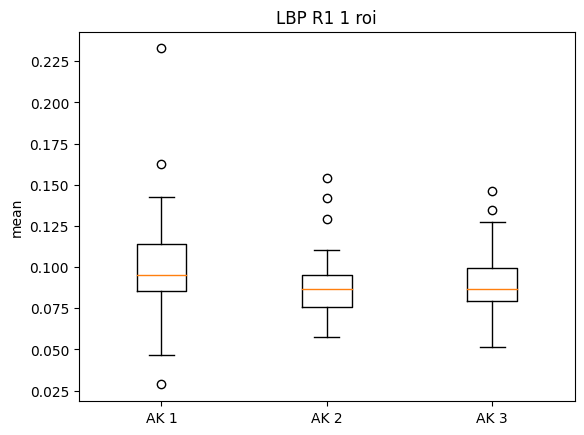

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.012     0.009     0.003     0.022
 (0 - 2)      0.010     0.086    -0.001     0.021
 (1 - 0)     -0.012     0.009    -0.022    -0.003
 (1 - 2)     -0.002     0.917    -0.015     0.010
 (2 - 0)     -0.010     0.086    -0.021     0.001
 (2 - 1)      0.002     0.917    -0.010     0.015

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9748023152351379, pvalue=0.06350267678499222)
ShapiroResult(statistic=0.9754120111465454, pvalue=0.4048459827899933)
ShapiroResult(statistic=0.9766295552253723, pvalue=0.6973932385444641)
One-Way ANOVA: No significant difference between groups (p = 0.1937).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9830389618873596, pvalue=0.2577231526374817)
ShapiroResult(statistic=0.9647048115730286, pvalue=0.15627463161945343)
ShapiroResult(statistic=0.9748978018760681, pvalue=0.6437573432922363)
One-Way ANOVA: There is a s

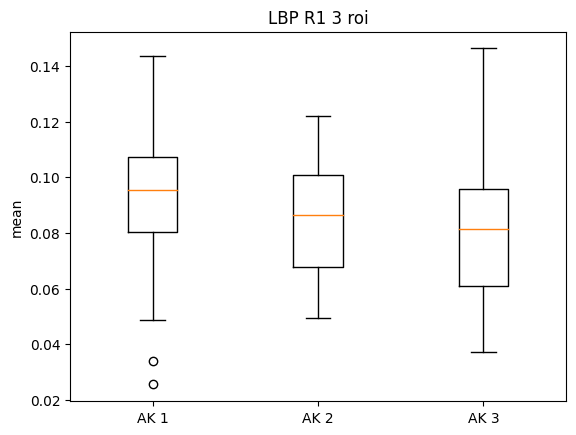

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.010     0.038     0.000     0.019
 (0 - 2)      0.012     0.024     0.001     0.023
 (1 - 0)     -0.010     0.038    -0.019    -0.000
 (1 - 2)      0.002     0.894    -0.010     0.014
 (2 - 0)     -0.012     0.024    -0.023    -0.001
 (2 - 1)     -0.002     0.894    -0.014     0.010

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9452871680259705, pvalue=0.0005951656494289637)
ShapiroResult(statistic=0.9508199691772461, pvalue=0.04311186447739601)
ShapiroResult(statistic=0.9806623458862305, pvalue=0.8186266422271729)
One-Way ANOVA: There is a significant difference between groups (p = 0.0341).


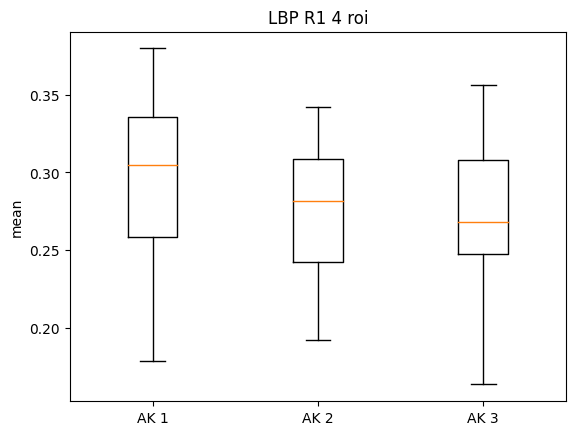

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.017     0.119    -0.003     0.038
 (0 - 2)      0.022     0.070    -0.001     0.046
 (1 - 0)     -0.017     0.119    -0.038     0.003
 (1 - 2)      0.005     0.894    -0.021     0.032
 (2 - 0)     -0.022     0.070    -0.046     0.001
 (2 - 1)     -0.005     0.894    -0.032     0.021

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9603423476219177, pvalue=0.005714650731533766)
ShapiroResult(statistic=0.9561580419540405, pvalue=0.07061566412448883)
ShapiroResult(statistic=0.9889078140258789, pvalue=0.980491578578949)
One-Way ANOVA: There is a significant difference between groups (p = 0.0097).


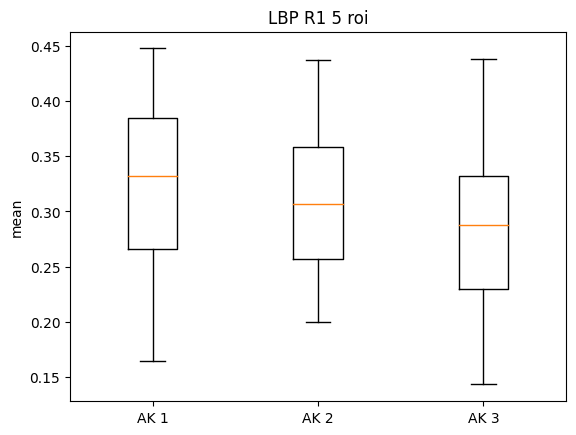

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.024     0.131    -0.005     0.054
 (0 - 2)      0.041     0.013     0.007     0.075
 (1 - 0)     -0.024     0.131    -0.054     0.005
 (1 - 2)      0.017     0.542    -0.021     0.055
 (2 - 0)     -0.041     0.013    -0.075    -0.007
 (2 - 1)     -0.017     0.542    -0.055     0.021

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9656299352645874, pvalue=0.013457773253321648)
ShapiroResult(statistic=0.9735023975372314, pvalue=0.3445959985256195)
ShapiroResult(statistic=0.9353844523429871, pvalue=0.055431436747312546)
One-Way ANOVA: No significant difference between groups (p = 0.5254).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8961265683174133, pvalue=1.5862132158872555e-06)
ShapiroResult(statistic=0.9751002788543701, pvalue=0.39449432492256165)
ShapiroResult(statistic=0.9832145571708679, pvalue=0.88570237159729)
One-Way ANOVA: There i

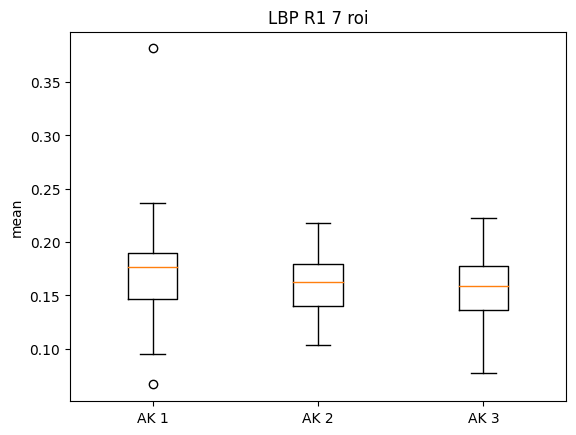

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.013     0.105    -0.002     0.027
 (0 - 2)      0.015     0.089    -0.002     0.032
 (1 - 0)     -0.013     0.105    -0.027     0.002
 (1 - 2)      0.002     0.948    -0.016     0.021
 (2 - 0)     -0.015     0.089    -0.032     0.002
 (2 - 1)     -0.002     0.948    -0.021     0.016

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9383749961853027, pvalue=0.0002288506511831656)
ShapiroResult(statistic=0.9824628829956055, pvalue=0.6837243437767029)
ShapiroResult(statistic=0.9653472304344177, pvalue=0.3817732334136963)
One-Way ANOVA: No significant difference between groups (p = 0.4103).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9851630926132202, pvalue=0.36152130365371704)
ShapiroResult(statistic=0.9632971882820129, pvalue=0.1371781826019287)
ShapiroResult(statistic=0.9671729803085327, pvalue=0.4252568483352661)
One-Way ANOVA: There is a

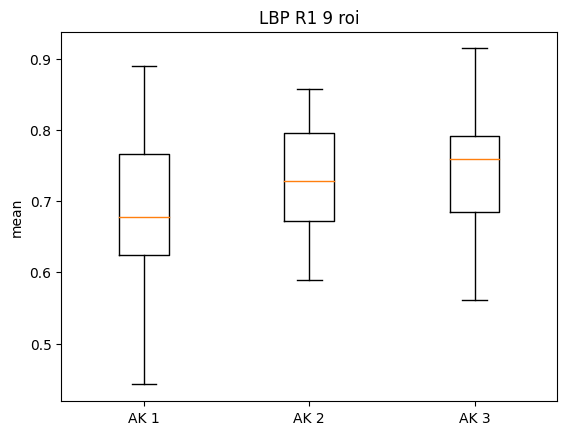

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.040     0.042    -0.078    -0.001
 (0 - 2)     -0.045     0.047    -0.089    -0.001
 (1 - 0)      0.040     0.042     0.001     0.078
 (1 - 2)     -0.005     0.965    -0.055     0.044
 (2 - 0)      0.045     0.047     0.001     0.089
 (2 - 1)      0.005     0.965    -0.044     0.055

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9808844327926636, pvalue=0.18011745810508728)
ShapiroResult(statistic=0.9665891528129578, pvalue=0.18588584661483765)
ShapiroResult(statistic=0.9558079242706299, pvalue=0.21022546291351318)
One-Way ANOVA: No significant difference between groups (p = 0.2819).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8306922316551208, pvalue=4.7323145402344835e-09)
ShapiroResult(statistic=0.9692940711975098, pvalue=0.23775458335876465)
ShapiroResult(statistic=0.9840730428695679, pvalue=0.9054036736488342)
One-Way ANOVA: There 

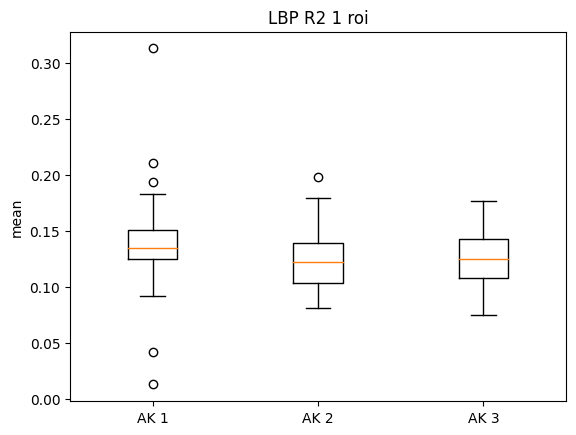

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.013     0.026     0.001     0.026
 (0 - 2)      0.013     0.090    -0.001     0.027
 (1 - 0)     -0.013     0.026    -0.026    -0.001
 (1 - 2)     -0.001     0.990    -0.017     0.015
 (2 - 0)     -0.013     0.090    -0.027     0.001
 (2 - 1)      0.001     0.990    -0.015     0.017

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9014945030212402, pvalue=2.7868038614542456e-06)
ShapiroResult(statistic=0.9867839813232422, pvalue=0.8599249124526978)
ShapiroResult(statistic=0.9830407500267029, pvalue=0.8815166354179382)
One-Way ANOVA: No significant difference between groups (p = 0.1813).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9729034900665283, pvalue=0.04582704231142998)
ShapiroResult(statistic=0.9753338098526001, pvalue=0.40223056077957153)
ShapiroResult(statistic=0.9516290426254272, pvalue=0.1603034883737564)
One-Way ANOVA: There is

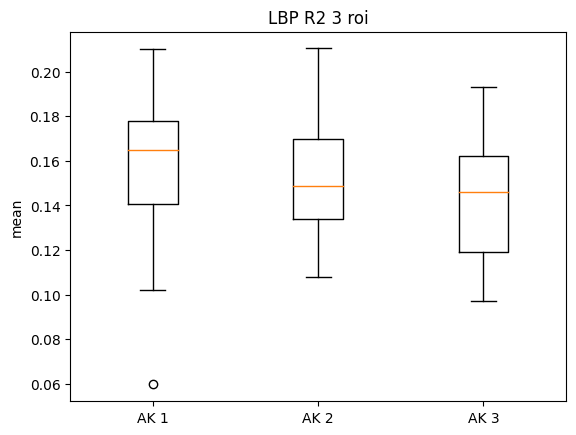

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.008     0.234    -0.004     0.019
 (0 - 2)      0.016     0.014     0.003     0.029
 (1 - 0)     -0.008     0.234    -0.019     0.004
 (1 - 2)      0.008     0.410    -0.007     0.023
 (2 - 0)     -0.016     0.014    -0.029    -0.003
 (2 - 1)     -0.008     0.410    -0.023     0.007

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9832662343978882, pvalue=0.26744985580444336)
ShapiroResult(statistic=0.9812794923782349, pvalue=0.6327765583992004)
ShapiroResult(statistic=0.9913588762283325, pvalue=0.9950941205024719)
One-Way ANOVA: No significant difference between groups (p = 0.11).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9801958799362183, pvalue=0.16030652821063995)
ShapiroResult(statistic=0.9840511679649353, pvalue=0.7517833113670349)
ShapiroResult(statistic=0.9382402300834656, pvalue=0.06674433499574661)
One-Way ANOVA: No significan

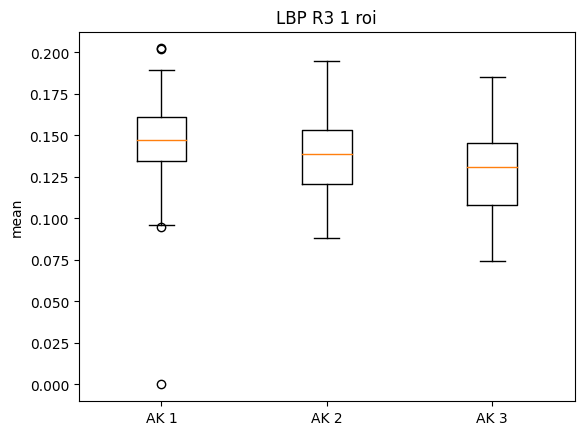

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.009     0.105    -0.001     0.020
 (0 - 2)      0.015     0.011     0.003     0.028
 (1 - 0)     -0.009     0.105    -0.020     0.001
 (1 - 2)      0.006     0.551    -0.008     0.020
 (2 - 0)     -0.015     0.011    -0.028    -0.003
 (2 - 1)     -0.006     0.551    -0.020     0.008

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8440046310424805, pvalue=1.3574166679575228e-08)
ShapiroResult(statistic=0.9795294404029846, pvalue=0.5592561960220337)
ShapiroResult(statistic=0.9695292711257935, pvalue=0.4865057170391083)
One-Way ANOVA: No significant difference between groups (p = 0.0684).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9025830030441284, pvalue=3.1306258279073518e-06)
ShapiroResult(statistic=0.9477145075798035, pvalue=0.03245111554861069)
ShapiroResult(statistic=0.9388768672943115, pvalue=0.06957364827394485)
One-Way ANOVA: No s

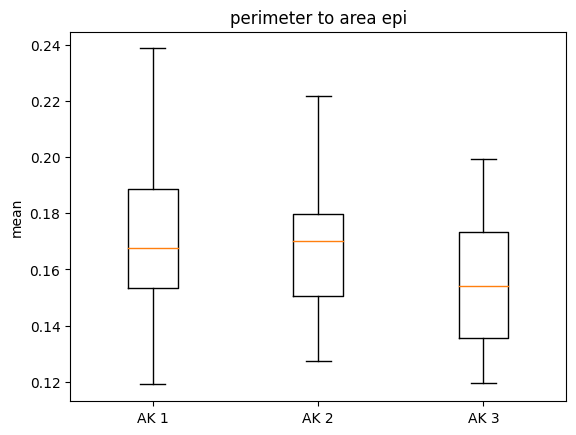

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.004     0.594    -0.006     0.014
 (0 - 2)      0.017     0.003     0.005     0.028
 (1 - 0)     -0.004     0.594    -0.014     0.006
 (1 - 2)      0.012     0.063    -0.001     0.025
 (2 - 0)     -0.017     0.003    -0.028    -0.005
 (2 - 1)     -0.012     0.063    -0.025     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6616659164428711, pvalue=1.7769642636673855e-13)
ShapiroResult(statistic=0.81600022315979, pvalue=3.0516891911247512e-06)
ShapiroResult(statistic=0.8987184762954712, pvalue=0.005745912902057171)
One-Way ANOVA: No significant difference between groups (p = 0.2071).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8658181428909302, pvalue=8.6755932215965e-08)
ShapiroResult(statistic=0.9654650688171387, pvalue=0.167633518576622)
ShapiroResult(statistic=0.952068567276001, pvalue=0.16496321558952332)
One-Way ANOVA: There 

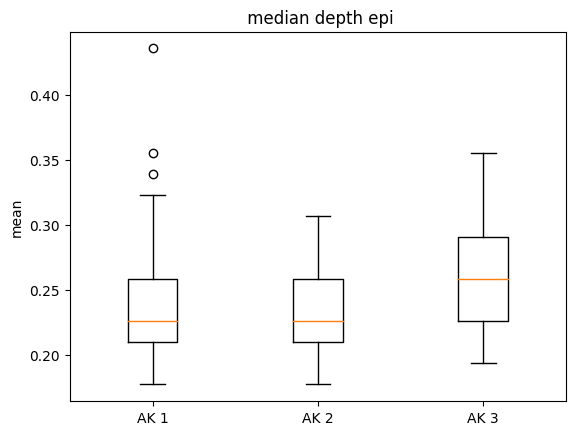

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.996    -0.016     0.017
 (0 - 2)     -0.030     0.001    -0.049    -0.011
 (1 - 0)     -0.001     0.996    -0.017     0.016
 (1 - 2)     -0.031     0.002    -0.052    -0.010
 (2 - 0)      0.030     0.001     0.011     0.049
 (2 - 1)      0.031     0.002     0.010     0.052

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7592105865478516, pvalue=3.5347107185668136e-11)
ShapiroResult(statistic=0.9733381867408752, pvalue=0.33976858854293823)
ShapiroResult(statistic=0.9533884525299072, pvalue=0.17975622415542603)
One-Way ANOVA: There is a significant difference between groups (p = 0.0041).


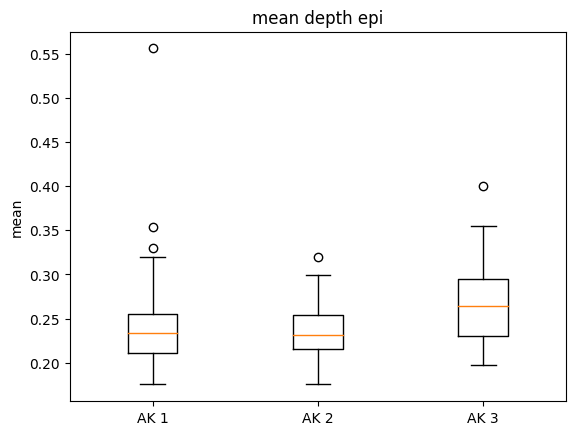

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.002     0.973    -0.017     0.020
 (0 - 2)     -0.029     0.005    -0.050    -0.007
 (1 - 0)     -0.002     0.973    -0.020     0.017
 (1 - 2)     -0.030     0.009    -0.054    -0.006
 (2 - 0)      0.029     0.005     0.007     0.050
 (2 - 1)      0.030     0.009     0.006     0.054

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.5120388269424438, pvalue=3.195194094896025e-16)
ShapiroResult(statistic=0.8140883445739746, pvalue=2.7497853807290085e-06)
ShapiroResult(statistic=0.8133662343025208, pvalue=7.34327913960442e-05)
One-Way ANOVA: No significant difference between groups (p = 0.3961).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.21899336576461792, pvalue=3.6839018492629004e-20)
ShapiroResult(statistic=0.5763843059539795, pvalue=1.5185253054994519e-10)
ShapiroResult(statistic=0.6134065389633179, pvalue=5.538802483329164e-08)
One-Way 

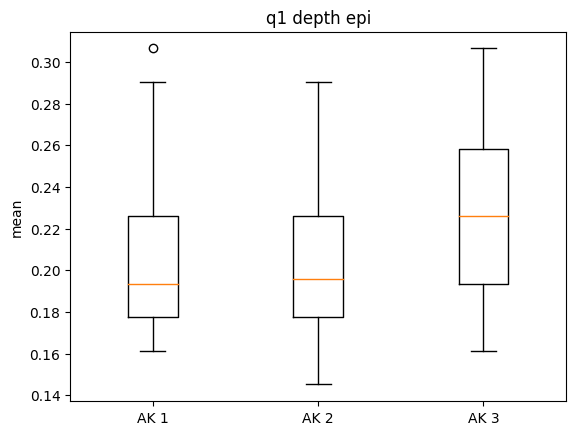

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.002     0.917    -0.017     0.012
 (0 - 2)     -0.024     0.002    -0.041    -0.007
 (1 - 0)      0.002     0.917    -0.012     0.017
 (1 - 2)     -0.022     0.018    -0.040    -0.003
 (2 - 0)      0.024     0.002     0.007     0.041
 (2 - 1)      0.022     0.018     0.003     0.040

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.4839499592781067, pvalue=1.1487071724902676e-16)
ShapiroResult(statistic=0.9532911777496338, pvalue=0.05413910746574402)
ShapiroResult(statistic=0.8864516019821167, pvalue=0.002848646603524685)
One-Way ANOVA: There is a significant difference between groups (p = 0.0236).


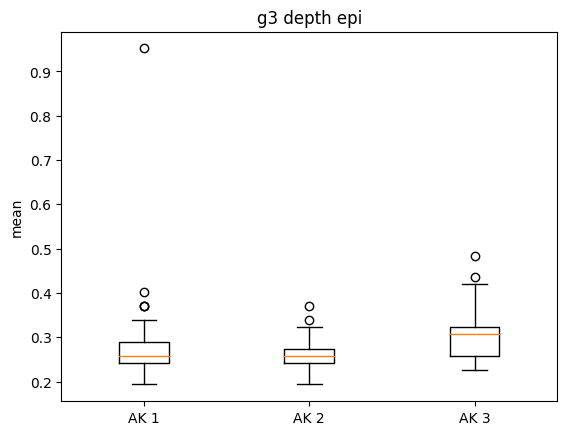

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.007     0.846    -0.022     0.035
 (0 - 2)     -0.034     0.042    -0.067    -0.001
 (1 - 0)     -0.007     0.846    -0.035     0.022
 (1 - 2)     -0.040     0.027    -0.077    -0.004
 (2 - 0)      0.034     0.042     0.001     0.067
 (2 - 1)      0.040     0.027     0.004     0.077

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6972503066062927, pvalue=1.0648358280199166e-12)
ShapiroResult(statistic=0.8384350538253784, pvalue=1.0874053259612992e-05)
ShapiroResult(statistic=0.8788264393806458, pvalue=0.0018679483328014612)
One-Way ANOVA: No significant difference between groups (p = 0.4547).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.977752149105072, pvalue=0.1055414229631424)
ShapiroResult(statistic=0.927093505859375, pvalue=0.005336364731192589)
ShapiroResult(statistic=0.9603850245475769, pvalue=0.2814115285873413)
One-Way ANOVA: No 

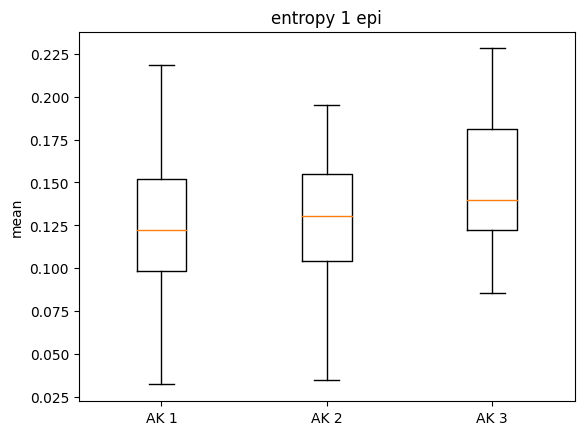

In [ ]:
# Inicjalizacja tablic na wyniki
wyniki_nom = np.zeros((k,5))
roznice_grupy = np.zeros((k,3))

# Analiza dla każdej cechy
for i in range(0,k):
    ft_name = column_names[i]
    Group1, Group2, Group3 = ak1[:,i], ak2[:,i], ak3[:,i]
    wyniki_nom[i,0:3] = normality(Group1, Group2, Group3)

    wyniki_nom[i,3] = varin(Group1, Group2, Group3).pvalue

    p_anova = get_anova(Group1, Group2, Group3)
    wyniki_nom[i,4] = p_anova

    # Jeśli istnieje istotna różnica, generuj wykres pudełkowy i przeprowadź test Tukeya HSD
    if p_anova < 0.05:
        fig, ax = plt.subplots(1, 1)
        ax.boxplot([Group1, Group2, Group3])
        ax.set_xticklabels(["AK 1", "AK 2", "AK 3"])
        ax.set_ylabel("mean")
        ax.set_title(ft_name)
        plt.show()
        p_tukey = get_tukey(Group1, Group2, Group3)
        roznice_grupy[i,0] = p_tukey[0,1] # grupa 1 vs 2
        roznice_grupy[i,1] = p_tukey[0,2] # grupa 1 vs 3
        roznice_grupy[i,2] = p_tukey[1,2] # grupa 2 vs 3
    else:
      # usuń kolumnę z kopii:
        CECHY_nowe.drop(columns=[ft_name], axis=1)

# Zapis wyników do plików CSV
df = pd.DataFrame(wyniki_nom)
df.to_csv(nazwa+'_res.csv', index=False)
df = pd.DataFrame(roznice_grupy)
df.to_csv(nazwa+'_roznice_grupy.csv', index=False)
df = pd.DataFrame(CECHY_nowe)
df.to_csv('CECHY_ANOVA.csv', index=False)